In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
maintenance_data=pd.read_csv('D:/Excel R/Project/Maintenance.csv')
maintenance_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
col1 = maintenance_data.iloc[:,[8,9,10,11,12,13]] 

In [ ]:
col1.apply(pd.Series.value_counts).head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,9661,9954,9885,9905,9902,9981
1,339,46,115,95,98,19


In [ ]:
## Vif Calculation for features

In [ ]:
maintenance_data[['TWF','HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']].corr()

,TWF,HDF,PWF,OSF,RNF,Machine failure
TWF,1.000000,-0.007332,0.008577,0.038243,0.030970,0.362904
HDF,-0.007332,1.000000,0.018443,0.046396,-0.004706,0.575800
PWF,0.008577,0.018443,1.000000,0.115836,-0.004273,0.522812
OSF,0.038243,0.046396,0.115836,1.000000,-0.004341,0.531083
RNF,0.030970,-0.004706,-0.004273,-0.004341,1.000000,0.004516
Machine failure,0.362904,0.575800,0.522812,0.531083,0.004516,1.000000


In [ ]:
maintenance_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='OSF'>

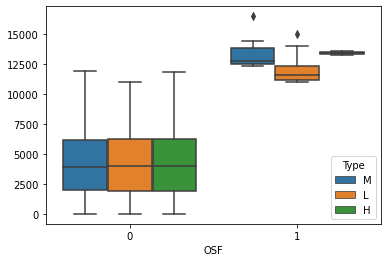

In [ ]:
sns.boxplot(x=maintenance_data["OSF"],y=maintenance_data["Torque [Nm]"]*maintenance_data["Tool wear [min]"],hue=maintenance_data["Type"])


<AxesSubplot:xlabel='PWF', ylabel='Rotational speed [rpm]'>

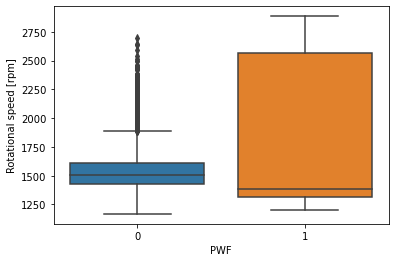

In [ ]:
sns.boxplot(x=maintenance_data["PWF"],y=maintenance_data["Rotational speed [rpm]"])

<AxesSubplot:xlabel='PWF'>

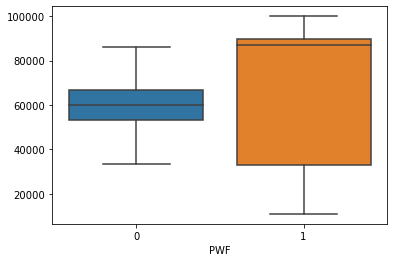

In [ ]:
sns.boxplot(x=maintenance_data["PWF"],y=maintenance_data["Torque [Nm]"]*maintenance_data["Rotational speed [rpm]"])

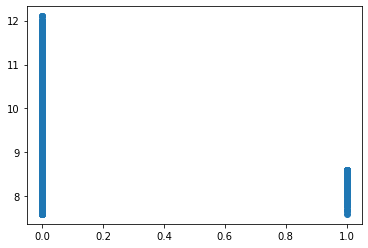

In [ ]:
plt.scatter(x=maintenance_data["HDF"],y=maintenance_data["Process temperature [K]"]-maintenance_data["Air temperature [K]"])

<AxesSubplot:xlabel='Type', ylabel='count'>

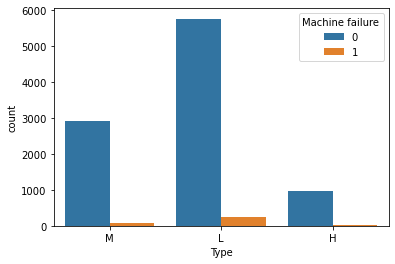

In [ ]:
sns.countplot(x="Type", hue="Machine failure", data=maintenance_data)

In [ ]:
maintenance_data.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [ ]:
maintenance_data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [ ]:
maintenance_data.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

In [ ]:
maintenance_data.info

<bound method DataFrame.info of      Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                       1551         42.8                0                0  
1                       1408         46.3                3                0  
2                       1

In [ ]:
maintenance_data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [ ]:
maintenance_data[maintenance_data.duplicated()].shape

(0, 7)

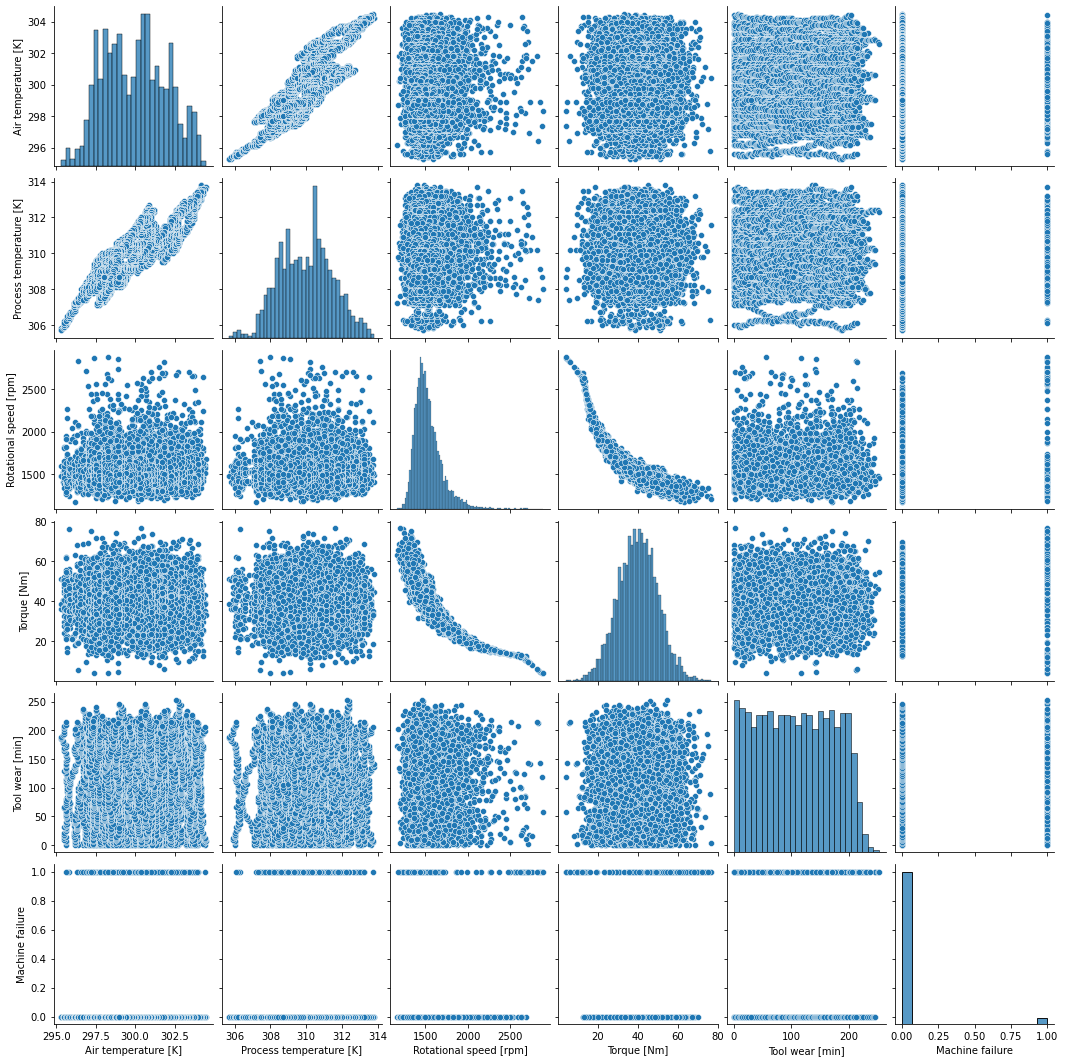

In [ ]:
import seaborn as sns
sns.pairplot(maintenance_data)

In [ ]:
maintenance_data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<AxesSubplot:>

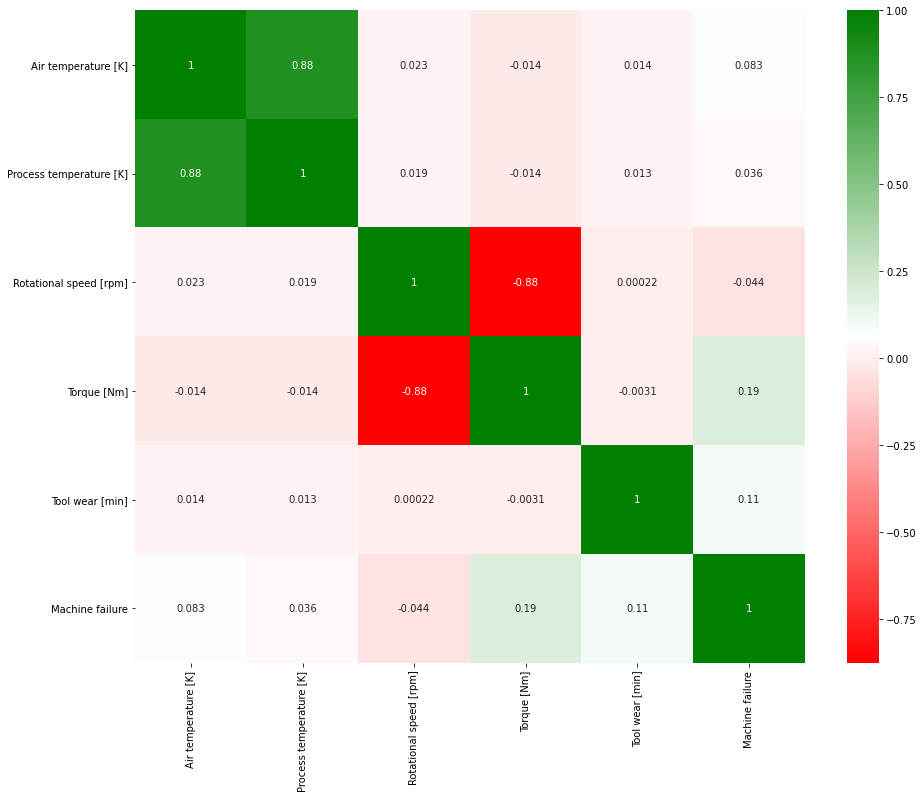

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

corr = maintenance_data.iloc[:, 0:7].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

<AxesSubplot:>

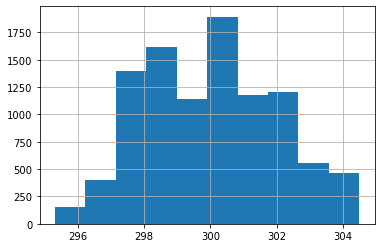

In [ ]:
maintenance_data['Air temperature [K]'].hist()

<AxesSubplot:>

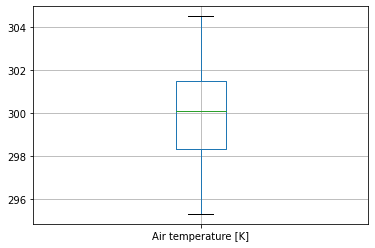

In [ ]:
maintenance_data.boxplot(column= ['Air temperature [K]'])

<AxesSubplot:>

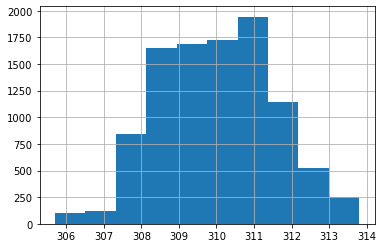

In [ ]:
maintenance_data['Process temperature [K]'].hist()

<AxesSubplot:>

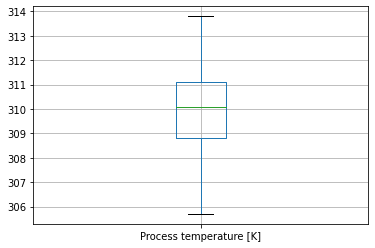

In [ ]:
maintenance_data.boxplot(column= ['Process temperature [K]'])

<AxesSubplot:>

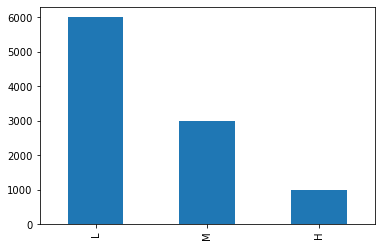

In [ ]:
maintenance_data['Type'].value_counts().plot.bar()

<AxesSubplot:>

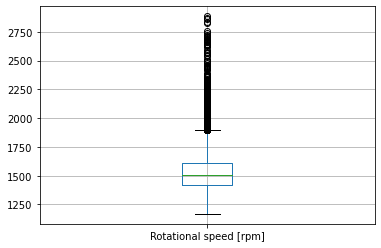

In [ ]:
maintenance_data.boxplot(column= ['Rotational speed [rpm]'])

<AxesSubplot:>

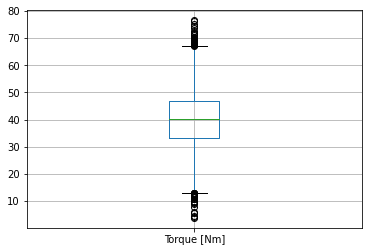

In [ ]:
maintenance_data.boxplot(column= ['Torque [Nm]'])

In [ ]:
#plt.savefig('out_T.png')

### Data preprocessing

In [ ]:
## convert categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
maintenance_data['Type']=le.fit_transform(maintenance_data['Type'])

In [ ]:
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [ ]:
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [ ]:
#plt.scatter(Air temperature [K], Process temperature [K], marker='*', color=['red','green'])
#plt.xlabel('Air temperature', fontsize=16)
#plt.ylabel('Process temperature', fontsize=16)
#plt.title('Group wise Weight vs Height scatter plot',fontsize=20)
#plt.show()




# Outlier Correction

<AxesSubplot:>

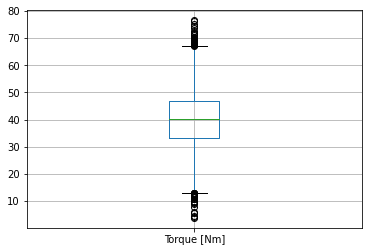

In [ ]:
maintenance_data.boxplot(column= ['Torque [Nm]'])

In [ ]:
Q1 = maintenance_data["Torque [Nm]"].quantile(0.25)

Q3 = maintenance_data["Torque [Nm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

13.599999999999994


In [ ]:
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

12.800000000000011
67.19999999999999


<AxesSubplot:>

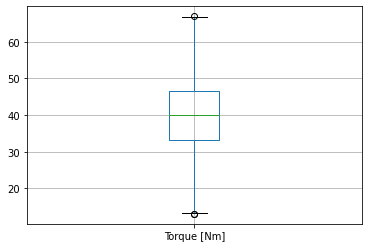

In [ ]:
out= maintenance_data[((maintenance_data["Torque [Nm]"] < Lower_Fence) |(maintenance_data["Torque [Nm]"] > Upper_Fence))].index

maintenance_data = maintenance_data.drop(out, axis=0)
maintenance_data.boxplot(column= ['Torque [Nm]'])

<AxesSubplot:>

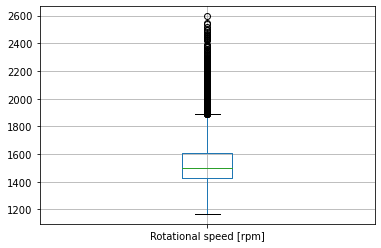

In [ ]:
maintenance_data.boxplot(column= ['Rotational speed [rpm]'])

In [ ]:
Q1 = maintenance_data["Rotational speed [rpm]"].quantile(0.25)

Q3 = maintenance_data["Rotational speed [rpm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

187.0


In [ ]:
Lower_Fence1 = Q1 - (1.5 * IQR)

Upper_Fence1 = Q3 + (1.5 * IQR)

print(Lower_Fence1)

print(Upper_Fence1)

1143.5
1891.5


<AxesSubplot:>

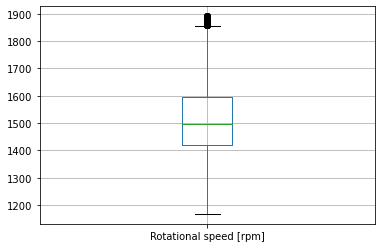

In [ ]:
out1= maintenance_data[((maintenance_data["Rotational speed [rpm]"] < Lower_Fence1) |(maintenance_data["Rotational speed [rpm]"] > Upper_Fence1))].index

maintenance_data = maintenance_data.drop(out1, axis=0)
maintenance_data.boxplot(column= ['Rotational speed [rpm]'])

In [ ]:
maintenance_data.corr()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Type,1.000000,0.016401,0.011979,-0.005571,0.005371,-0.002634,-0.011767
Air temperature [K],0.016401,1.000000,0.875531,0.012881,-0.006591,0.015566,0.091951
Process temperature [K],0.011979,0.875531,1.000000,0.016485,-0.011388,0.015332,0.039451
Rotational speed [rpm],-0.005571,0.012881,0.016485,1.000000,-0.892287,0.007008,-0.172143
Torque [Nm],0.005371,-0.006591,-0.011388,-0.892287,1.000000,-0.006590,0.222470
Tool wear [min],-0.002634,0.015566,0.015332,0.007008,-0.006590,1.000000,0.119609
Machine failure,-0.011767,0.091951,0.039451,-0.172143,0.222470,0.119609,1.000000


In [ ]:
maintenance_data.drop(['Rotational speed [rpm]'], axis=1, inplace=True)

# Balancing the data by Upsampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(maintenance_data.iloc[:,[0,1,2,3,4]], maintenance_data['Machine failure'])

In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(maintenance_data['Machine failure']))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 9262, 1: 267})
Resampled dataset shape Counter({0: 9262, 1: 9262})


In [ ]:
maintenance_data = pd.concat([X_res, y_res], axis=1)
maintenance_data.head()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,42.8,0,0
1,1,298.2,308.7,46.3,3,0
2,1,298.1,308.5,49.4,5,0
3,1,298.2,308.6,39.5,7,0
4,1,298.2,308.7,40.0,9,0


# Normalization of the data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = maintenance_data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df.columns=(maintenance_data.columns)
df

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,1.0,0.304348,0.358025,0.484009,0.000000,0.0
1,0.5,0.315217,0.370370,0.558635,0.011858,0.0
2,0.5,0.304348,0.345679,0.624733,0.019763,0.0
3,0.5,0.315217,0.358025,0.413646,0.027668,0.0
4,0.5,0.315217,0.370370,0.424307,0.035573,0.0
...,...,...,...,...,...,...
18519,0.5,0.333785,0.397289,0.827320,0.853755,1.0
18520,0.5,0.492990,0.465155,0.725308,0.818182,1.0
18521,0.5,0.364991,0.315935,0.670456,0.861660,1.0
18522,0.5,0.671696,0.630637,0.788332,0.747036,1.0


In [ ]:
maintenance_data.describe()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,1.078223,300.533121,310.180104,46.506828,129.371356,0.500000
std,0.532771,1.968580,1.316615,10.462489,70.959019,0.500013
min,0.000000,295.300000,305.700000,20.100000,0.000000,0.000000
25%,1.000000,298.900000,309.223298,38.200000,66.750000,0.000000
50%,1.000000,300.700000,310.381506,47.412508,136.000000,0.500000
75%,1.000000,302.238098,311.080994,54.333274,199.000000,1.000000
max,2.000000,304.500000,313.800000,67.000000,253.000000,1.000000


In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     18524 non-null  float64
 1   Air temperature [K]      18524 non-null  float64
 2   Process temperature [K]  18524 non-null  float64
 3   Torque [Nm]              18524 non-null  float64
 4   Tool wear [min]          18524 non-null  float64
 5   Machine failure          18524 non-null  float64
dtypes: float64(6)
memory usage: 868.4 KB


### Splitting the data into test and train

In [ ]:
train = df.iloc[:,:5] 
(train)
test = df.iloc[:,5]
test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18519    1.0
18520    1.0
18521    1.0
18522    1.0
18523    1.0
Name: Machine failure, Length: 18524, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2)

In [ ]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (14819, 5) (14819,)
Test set: (3705, 5) (3705,)


# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(x_test)
yhat

array([1., 0., 1., ..., 1., 0., 1.])

In [ ]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.31342374, 0.68657626],
       [0.72371697, 0.27628303],
       [0.23602028, 0.76397972],
       ...,
       [0.22206755, 0.77793245],
       [0.64716064, 0.35283936],
       [0.49637756, 0.50362244]])

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)


0.6859066859066859

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1626  235]
 [ 418 1426]]


Confusion matrix, without normalization
[[1626  235]
 [ 418 1426]]


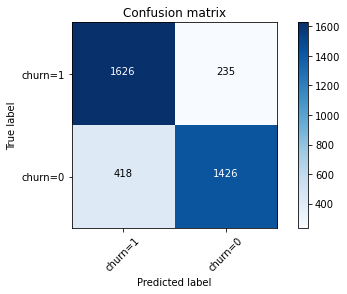

In [ ]:
import numpy as np

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[1626  235]
 [ 418 1426]]


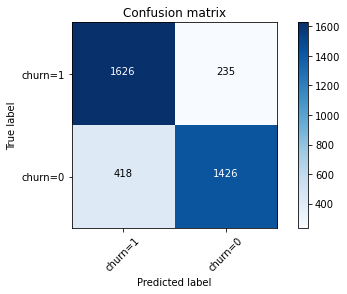

In [ ]:
# Compute confusion matrix
import numpy as np
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1844
         1.0       0.80      0.87      0.83      1861

    accuracy                           0.82      3705
   macro avg       0.83      0.82      0.82      3705
weighted avg       0.83      0.82      0.82      3705



In [ ]:

from sklearn.metrics import accuracy_score
print("accuraccy score :",np.round(accuracy_score(y_test,yhat),3))
lr_accurracy = np.round(accuracy_score(y_test,yhat),3)
lr_accurracy 
lr_recall_score = np.round(recall_score(y_test,yhat),3)
lr_recall_score
lr_prec = np.round(precision_score(y_test,yhat),3)
lr_prec
lr_f1 = np.round(f1_score(y_test,yhat),3)
lr_f1

accuraccy score : 0.824


0.833

### Model Building

In [ ]:
LR2=  df.copy()
LR2.head()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,1.0,0.304348,0.358025,0.484009,0.000000,0.0
1,0.5,0.315217,0.370370,0.558635,0.011858,0.0
2,0.5,0.304348,0.345679,0.624733,0.019763,0.0
3,0.5,0.315217,0.358025,0.413646,0.027668,0.0
4,0.5,0.315217,0.370370,0.424307,0.035573,0.0


In [ ]:
LR2.drop(['Air temperature [K]'], axis=1, inplace=True)
LR2

,Type,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,1.0,0.358025,0.484009,0.000000,0.0
1,0.5,0.370370,0.558635,0.011858,0.0
2,0.5,0.345679,0.624733,0.019763,0.0
3,0.5,0.358025,0.413646,0.027668,0.0
4,0.5,0.370370,0.424307,0.035573,0.0
...,...,...,...,...,...
18519,0.5,0.397289,0.827320,0.853755,1.0
18520,0.5,0.465155,0.725308,0.818182,1.0
18521,0.5,0.315935,0.670456,0.861660,1.0
18522,0.5,0.630637,0.788332,0.747036,1.0


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
# calculate_vif(dataset):
# vif= pd.DataFrame()
# vif['features'] = dataset.columns
# vif['VIF_values'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]


# #view VIF for each explanatory variable 
# return vif
# features= maintenance_data.iloc[0:5]
# calculate_vif(features)


In [ ]:
train = LR2.iloc[:,:4] 
(train)
test = LR2.iloc[:,4]
test


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18519    1.0
18520    1.0
18521    1.0
18522    1.0
18523    1.0
Name: Machine failure, Length: 18524, dtype: float64

In [ ]:
x_trainLR2,x_testLR2,y_trainLR2,y_testLR2 = train_test_split(train,test,test_size=0.2)

In [ ]:
print ('Train set:', x_trainLR2.shape,  y_trainLR2.shape)
print ('Test set:', x_testLR2.shape,  y_testLR2.shape)

Train set: (14819, 4) (14819,)
Test set: (3705, 4) (3705,)


In [ ]:
#x_trainLR2,x_testLR2,y_trainLR2,y_testLR2 = train_test_split(trainLR2,tesLR2t,test_size=0.2)

In [ ]:
LRModel2 = LogisticRegression(C=0.01, solver='liblinear').fit(x_trainLR2,y_trainLR2)
LRModel2

LogisticRegression(C=0.01, solver='liblinear')

0.51
0.563
Confusion matrix, without normalization
[[1029  799]
 [1015  862]]


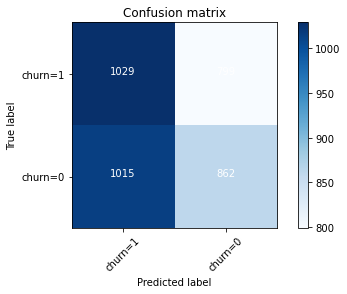

In [ ]:
import numpy as np

cnf_matrix = confusion_matrix(y_testLR2, yhat, labels=[1,0])
np.set_printoptions(precision=2)

lr2_acc= np.round(accuracy_score(y_testLR2, yhat),3)
print(lr2_acc)
lr2_recall = np.round(recall_score(y_testLR2,yhat),3)
print(lr2_recall)
lr2_prec = np.round(precision_score(y_testLR2,yhat),3)
lr2_prec
lr2_f1 = np.round(f1_score(y_testLR2,yhat),3)
lr2_f1

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_testLR2, yhat))

              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49      1877
         1.0       0.50      0.56      0.53      1828

    accuracy                           0.51      3705
   macro avg       0.51      0.51      0.51      3705
weighted avg       0.51      0.51      0.51      3705



# DECISION TREE




In [ ]:
df = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
df # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
df.fit(x_train,y_train)
predTree = df.predict(x_test)

In [ ]:
print (predTree [0:5])
print (y_test [0:5])


[1. 0. 0. 0. 1.]
16638    1.0
4265     0.0
1678     0.0
2011     0.0
4096     0.0
Name: Machine failure, dtype: float64


In [ ]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9095816464237517


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predTree)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


In [ ]:
print('accuracyscore is    : ',round(accuracy_score(y_test,predTree),3))
dt_accuraccy = round(accuracy_score(y_test,predTree),3)
print('precision is        : ',round(precision_score(y_test,predTree),3))
print('AUc score is        : ',round(roc_auc_score(y_test,predTree),3))
print('recall value is     : ',round(recall_score(y_test,predTree),3))
dt_recall = round(recall_score(y_test,predTree),3)
print('classification report is: \n', classification_report(y_test,predTree))
dt_prec = np.round(precision_score(y_test,predTree),3)
dt_prec
dt_f1 = np.round(f1_score(y_test,predTree),3)
dt_f1
    
print(confusion_matrix(y_test,predTree))
    

accuracyscore is    :  0.91
precision is        :  0.876
AUc score is        :  0.909
recall value is     :  0.955
classification report is: 
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      1844
         1.0       0.88      0.96      0.91      1861

    accuracy                           0.91      3705
   macro avg       0.91      0.91      0.91      3705
weighted avg       0.91      0.91      0.91      3705

[[1592  252]
 [  83 1778]]


# Support Vector Mahcine

In [ ]:
import numpy as np
from sklearn.svm import SVC

In [ ]:
clf = SVC(C= 20, gamma = 52)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred)
print("Accuracy =", svm_acc)
svm_prec = np.round(precision_score(y_test,y_pred),3)
svm_prec
svm_f1 = np.round(f1_score(y_test,y_pred),3)
svm_f1

confusion_matrix(y_test, y_pred)

Accuracy = 0.974089068825911


array([[1768,   76],
       [  20, 1841]], dtype=int64)

In [ ]:
print("recall score :",np.round(recall_score(y_test,y_pred),3))
svm_recall = np.round(recall_score(y_test,y_pred),3)

recall score : 0.989


# Naive Bays

In [ ]:
from sklearn.naive_bayes import MultinomialNB  

In [ ]:
mb = MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
pred_mb = mb.predict(x_test)

In [ ]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_mb),3))
nbmb_acc = np.round(accuracy_score(y_test,pred_mb),3)
print("recall score :",np.round(recall_score(y_test,pred_mb),3))
nbmb_recall = np.round(recall_score(y_test,pred_mb),3)
print("f1 score :",np.round(f1_score(y_test,pred_mb),3))
nbmb_prec = np.round(precision_score(y_test,pred_mb),3)
nbmb_prec
nbmb_f1 = np.round(f1_score(y_test,pred_mb),3)
nbmb_f1
print("precision score  :",np.round( precision_score(y_test,pred_mb),3))

accuraccy score : 0.758
recall score : 0.798
f1 score : 0.768
precision score  : 0.741


In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_mb))

Confusion matrix :
 [[1324  520]
 [ 376 1485]]


# Naive Bayes using GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred_gb = gb.predict(x_test)

In [ ]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_gb),3))
nbgb_acc = np.round(accuracy_score(y_test,pred_gb),3)
print("recall score :",np.round(recall_score(y_test,pred_gb),3))
nbgb_recall = np.round(recall_score(y_test,pred_gb),3)
print("f1 score :",np.round(f1_score(y_test,pred_gb),3))
print("precision score  :",np.round( precision_score(y_test,pred_gb),3))

nbgb_prec = np.round(precision_score(y_test,pred_gb),3)
nbgb_f1 = np.round(f1_score(y_test,pred_gb),3)


accuraccy score : 0.832
recall score : 0.863
f1 score : 0.837
precision score  : 0.813


In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_gb))

Confusion matrix :
 [[1475  369]
 [ 255 1606]]


In [ ]:
per=((1488  +1701)/(1488  +472+204 +1701))*100
per

82.50970245795601

# K-Neighbour

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors=11)
results = cross_val_score(kn, x_train, y_train, cv=3)

In [ ]:
print("result :",np.round(results.mean(),3))

result : 0.933


In [ ]:
# choose k between 1 to 41
k_range = range(0,15)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train, y_train, cv=10)
    k_scores.append(scores.mean())

In [ ]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
knn_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
knn_recall = round(recall_score(y_test,y_pred),3)
knn_prec = np.round(precision_score(y_test,y_pred),3)
knn_f1 = np.round(f1_score(y_test,y_pred),3)

print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    

accuracyscore is    :  0.974
precision is        :  0.96
AUc score is        :  0.974
recall value is     :  0.989
classification report is: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1844
         1.0       0.96      0.99      0.97      1861

    accuracy                           0.97      3705
   macro avg       0.97      0.97      0.97      3705
weighted avg       0.97      0.97      0.97      3705

[[1768   76]
 [  20 1841]]


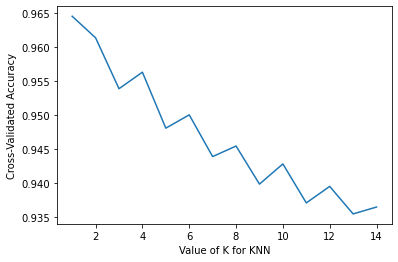

In [ ]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Random Forest

In [ ]:
rf_model=RandomForestClassifier()

accuracyscore is    :  0.976
precision is        :  0.967
AUc score is        :  0.976
recall value is     :  0.986
0.967
classification report is: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1844
         1.0       0.97      0.99      0.98      1861

    accuracy                           0.98      3705
   macro avg       0.98      0.98      0.98      3705
weighted avg       0.98      0.98      0.98      3705

[[1781   63]
 [  26 1835]]


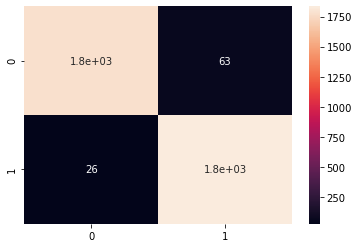

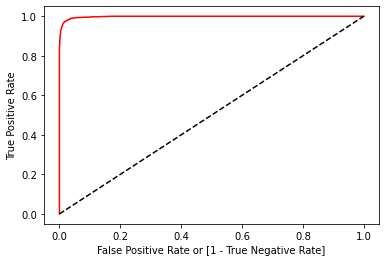

In [ ]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
rf_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
rf_recall =round(recall_score(y_test,y_pred),3)
rf_prec = np.round(precision_score(y_test,y_pred),3)
rf_f1 = np.round(f1_score(y_test,y_pred),3)
print(rf_prec)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Adaboosting

In [ ]:
ad_model=AdaBoostClassifier()

accuracyscore is    :  0.909
precision is        :  0.907
AUc score is        :  0.909
recall value is     :  0.913
classification report is: 
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1844
         1.0       0.91      0.91      0.91      1861

    accuracy                           0.91      3705
   macro avg       0.91      0.91      0.91      3705
weighted avg       0.91      0.91      0.91      3705

[[1670  174]
 [ 162 1699]]


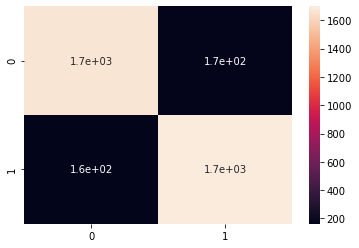

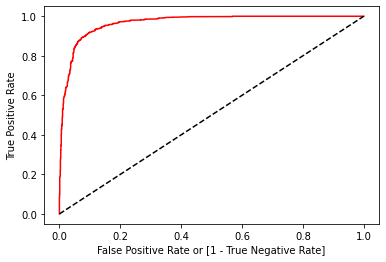

In [ ]:
ad_model.fit(x_train,y_train)
y_pred=ad_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
ada_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
ada_recall = round(recall_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
ada_prec = np.round(precision_score(y_test,y_pred),3)
ada_f1 = np.round(f1_score(y_test,y_pred),3)
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, ad_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Gradient boosting

In [ ]:
gb_model=GradientBoostingClassifier()

accuracyscore is    :  0.941
precision is        :  0.929
AUc score is        :  0.941
recall value is     :  0.955
classification report is: 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1844
         1.0       0.93      0.96      0.94      1861

    accuracy                           0.94      3705
   macro avg       0.94      0.94      0.94      3705
weighted avg       0.94      0.94      0.94      3705

[[1709  135]
 [  83 1778]]


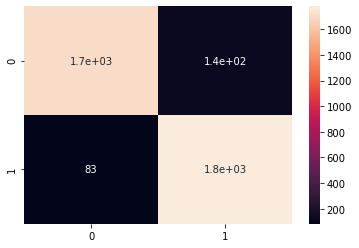

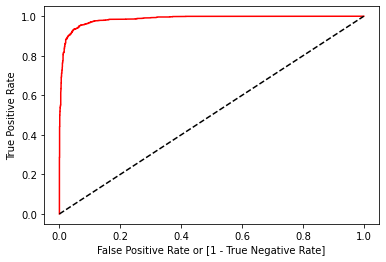

In [ ]:
gb_model.fit(x_train,y_train)
y_pred=gb_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
gb_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
gb_recall = round(recall_score(y_test,y_pred),3)
gb_prec = np.round(precision_score(y_test,y_pred),3)
gb_f1 = np.round(f1_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## Table

In [ ]:
data11 = {"Models":pd.Series(["Logistic Regression","Logistic Regression(wit-air)","Decision Tree","SVM","Naive Bayes_multinomial","Naive Bayes_guassian","Random forest",'KNN','adabosting','Gradient boostig']),
          "Accuracy":pd.Series([lr_accurracy,lr2_acc,dt_accuraccy,svm_acc,nbmb_acc,nbgb_acc,rf_acc,knn_acc,ada_acc,gb_acc]),"Recall":pd.Series([lr_recall_score,lr2_recall,dt_recall,svm_recall,nbmb_recall,nbgb_recall,rf_recall,knn_recall,ada_recall,gb_recall]),
          "Precision":pd.Series([lr_prec,lr2_prec,dt_prec,svm_prec,nbmb_prec,nbgb_prec,rf_prec,knn_prec,ada_prec,gb_prec]),
          "F1_Score":pd.Series([lr_f1,lr2_f1,dt_f1,svm_f1,nbmb_f1,nbgb_f1,rf_f1,knn_f1,ada_f1,gb_f1])}
table = pd.DataFrame(data11)
table.sort_values(['Accuracy'])

,Models,Accuracy,Recall,Precision,F1_Score
1,Logistic Regression(wit-air),0.510000,0.563,0.503,0.532
4,Naive Bayes_multinomial,0.758000,0.798,0.741,0.768
0,Logistic Regression,0.824000,0.874,0.795,0.833
5,Naive Bayes_guassian,0.832000,0.863,0.813,0.837
8,adabosting,0.909000,0.913,0.907,0.910
2,Decision Tree,0.910000,0.955,0.876,0.914
9,Gradient boostig,0.941000,0.955,0.929,0.942
7,KNN,0.974000,0.989,0.960,0.975
3,SVM,0.974089,0.989,0.960,0.975
6,Random forest,0.976000,0.986,0.967,0.976


## Vif_Table

In [ ]:
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(data):
    vif= pd.DataFrame()
    vif["features"]=data.columns
    vif["VIF_value"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif

In [ ]:
vif_table = np.round(calculate_vif(machine),3)
vif_table


NameError: name 'machine' is not defined

In [ ]:
vif_table.sort_values(['VIF_value'])